#JOSÉ RICARDO CASTILLO BASTIDAS - MBID 08 - VISUALIZACION DE DATOS


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import io
%matplotlib inline
from google.colab import files

##Importamos el dataset


In [6]:
uploaded = files.upload()
personas = pd.read_csv(io.BytesIO(uploaded['master.csv']))
personas.head()

Saving master.csv to master.csv


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


##Observamos información general del dataset


In [7]:
personas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
personas.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

##Reordenamos el dataset

In [11]:
personas[" gdp_for_year ($) "] = personas[" gdp_for_year ($) "].str.replace(",","").astype(np.int64)
personas["age"] = personas["age"].str.replace("5-14 years","05-14 years")

##Observamos la evolución por año diferenciando por el sexo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


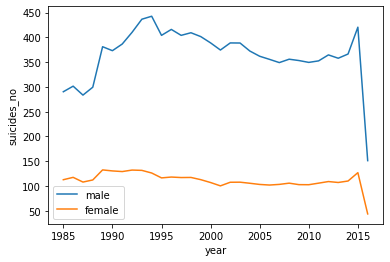

In [14]:
df_men = personas[personas.sex == "male"]
df_women = personas[personas.sex == "female"]
sns.lineplot(df_men.year, personas.suicides_no, ci = None)
sns.lineplot(df_women.year, personas.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

No importa que año observemos, el número de suicidios de hombres es paorximadamente tres veces mayor que el de las mujeres, ¿Que podremos observar con respecto a la edad?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


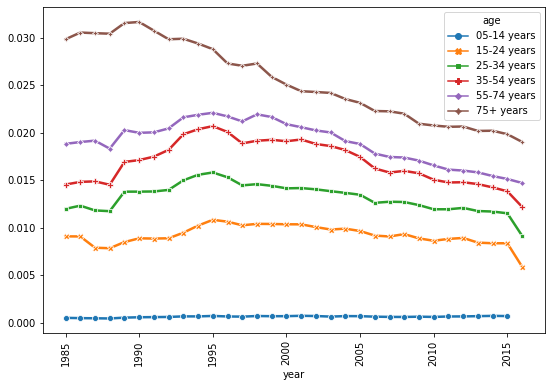

In [15]:
df_age = personas.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

Se observa que evidentemente, la tasa de suicidio aumenta a mayor edad. Se podría decir que la edad es un factor importante en la tasa de suicidio.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


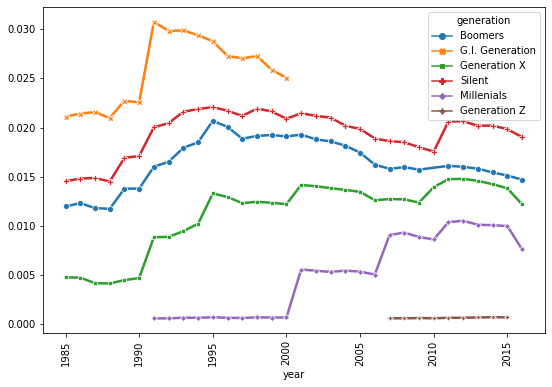

In [16]:
df_generation = personas.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

Antes del año 2000, podemos ver que la tasa de suicidio más alta es la de la generación de la Primera Guerra Mundial, y esta generación es también conocida como la generación de la Segunda Guerra Mundial. Ellos sufrieron la gran depresión mundial antes de la Segunda Guerra Mundial, en este momento, los ingresos, los beneficios, los impuestos se reducen seriamente, por lo que esta generación experimentó la agitación económica y social.

¿Este tipo de impacto social afectó a la tasa de suicidio de la generación G.I.? En comparación con la generación silenciosa después del 2000, la tasa de suicidio no es tan alta.

Curiosamente, la tasa de suicidio de la Generación X y de los Millenials aumenta paso a paso. Además, la tasa de suicidio aumenta rápidamente cuando la edad media de la generación supera los 20 años. ¿Significa esto que la tasa de suicidio de los jóvenes aumenta cuando se independizan de sus padres? En otras palabras, una familia sana ayuda a la tasa de suicidio. Echemos un vistazo.

##calculamos la tasa de suicidio para cada año, y luego tomamos la media del número como tasa.

In [24]:
df_suino = personas.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = personas.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [25]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

##PIB de cada pais por año

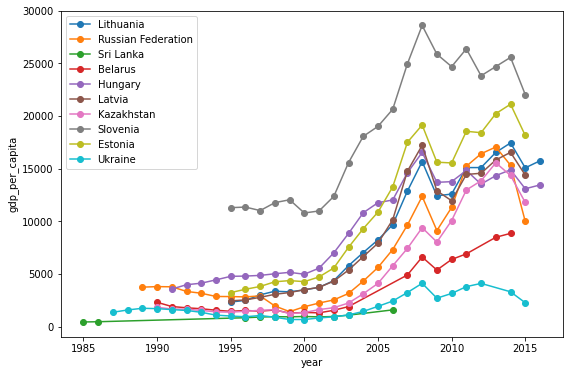

In [26]:
plt.figure(figsize = (9,6))
df_gdp = personas.groupby(["country","year"])["gdp_per_capita ($)"].mean()
for country in country_list[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("gdp_per_capita")
plt.legend()
plt.show()

En esta imagen podemos ver que el PIB per cápita no difiere de 1990 a 2000. En otras palabras, la situación económica se mantuvo estancada y algunos países empeoraron hasta 2002, después de 2005, el PIB de todos los países comenzó a crecer.

También sabemos que todo el PIB per cápita cayó en 2008 debido a la crisis financiera. Sin embargo, estos ratios siguen siendo mejores que los de antes de 2000. Para ver la relación entre la tasa de suicidio y el PIB per cápita, trazamos el gráfico de regresión de dos parámetros.

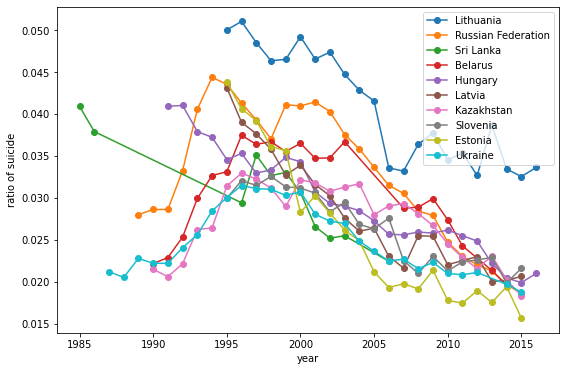

In [27]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    plt.plot(df_total[country].index,df_total[country].values, label=country, marker="o")
plt.xlabel("year")
plt.ylabel("ratio of suicide")
plt.legend()
plt.show()

Está claro que la tasa de suicidio de algunos de los 10 países más importantes aumentó drásticamente después de 1990. Además, la tasa en otros sigue siendo alta entre 1990 y 2000. La transición a la economía y la democracia en los países de la antigua Unión Soviética pueden ser las principales razones. Aunque se han realizado numerosos estudios sobre el aumento de la mortalidad, como el alcoholismo, las dificultades económicas, la desprestigio, etc., todavía no se ha aceptado que sea el factor más significativo de la crisis de mortalidad.

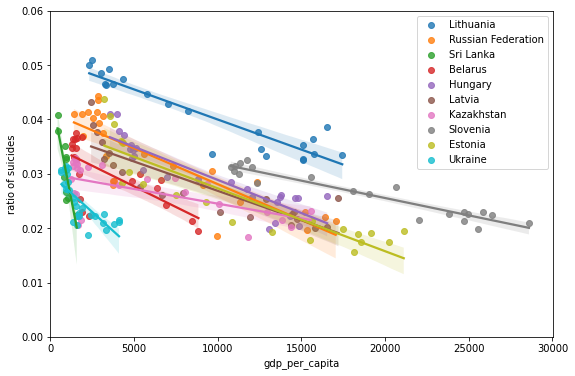

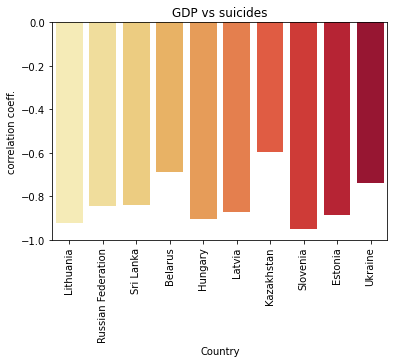

In [28]:
plt.figure(figsize = (9,6))
for country in country_list[:10]:
    sns.regplot(x=df_gdp[country].values, y=df_total[country].values, label = country)
plt.xlabel("gdp_per_capita")
plt.ylabel("ratio of suicides")
plt.ylim(0,0.06)
plt.xlim(0)
plt.legend()
plt.show()

corr_eff = {}
for country in country_list[:10]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values,df_total[country].values)
    corr_eff[country] = float(r_value)
    
sns.barplot(x=list(corr_eff.keys()), y=list(corr_eff.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("correlation coeff.")
plt.title("GDP vs suicides")
plt.show()

Observamos una alta correlación entre el PIB del top 10 de paises con mayor tasa de suicidios.